<a href="https://colab.research.google.com/github/FreeeSoul/DataScience/blob/main/20230221_FastCampus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 이번 시간에는 Multi Variables 시작

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [8]:
!ls -al '/gdrive/MyDrive/data'

total 5402
-rw------- 1 root root  337847 Jul 16  2022 data_202001.csv
-rw------- 1 root root  314682 Jul 16  2022 data_202002.csv
-rw------- 1 root root 4205435 Jul 16  2022 data_2020_1_12.csv
-rw------- 1 root root  652442 Jul 16  2022 data_2020.csv
drwx------ 2 root root    4096 Jul 16  2022 .ipynb_checkpoints
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202001
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202002
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202003
drwx------ 2 root root    4096 Feb 19 04:10 취업캠프


In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (11.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [11]:
plt.rc('font', family='NanumBarunGothic')

#2. 이제 기본 세팅 했으니 Data load하자!

In [106]:
import pandas as pd
file = '/gdrive/MyDrive/data/data_2020_1_12.csv'
data = pd.read_csv(file)

In [107]:
!ls -al '/gdrive/MyDrive/data'

total 5402
-rw------- 1 root root  337847 Jul 16  2022 data_202001.csv
-rw------- 1 root root  314682 Jul 16  2022 data_202002.csv
-rw------- 1 root root 4205435 Jul 16  2022 data_2020_1_12.csv
-rw------- 1 root root  652442 Jul 16  2022 data_2020.csv
drwx------ 2 root root    4096 Jul 16  2022 .ipynb_checkpoints
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202001
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202002
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202003
drwx------ 2 root root    4096 Feb 19 04:10 취업캠프


In [108]:
data.head() # 우리는 집계시, 요일까지 input으로 넣어서 Multi_input을 실현할꺼다.

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [109]:
data['도착영업소코드'] = data['도착영업소코드'].map({105 : 20, 110 : 77, 115 : 135, 120 : 185, 125 : 240, 130 : 215, 135 : 339, 140 : 407})

In [110]:
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,215,8806,3
152866,20201231,5,101,215,8733,3
152867,20201231,6,101,77,3173,3
152868,20201231,13,101,77,3866,3


In [111]:
data.rename(columns={'도착영업소코드' : '거리'}, inplace=True)

In [112]:
data

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,215,8806,3
152866,20201231,5,101,215,8733,3
152867,20201231,6,101,77,3173,3
152868,20201231,13,101,77,3866,3


In [113]:
data = data[data['거리'].isin([407])]

In [114]:
data.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
292,20200101,6,101,407,15824,2
293,20200101,6,101,407,19623,2
294,20200101,9,101,407,18048,2
295,20200101,17,101,407,17979,2
296,20200101,11,101,407,17349,2


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8954 entries, 292 to 152864
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     8954 non-null   int64
 1   집계시      8954 non-null   int64
 2   출발영업소코드  8954 non-null   int64
 3   거리       8954 non-null   int64
 4   통행시간     8954 non-null   int64
 5   요일       8954 non-null   int64
dtypes: int64(6)
memory usage: 489.7 KB


In [116]:
data_new = data.groupby(['집계시', '요일', '거리'])['통행시간'].mean()

In [117]:
data_new

집계시  요일  거리 
0    0   407    15549.675676
     1   407    15983.102564
     2   407    15129.750000
     3   407    14533.189189
     4   407    15908.275000
                    ...     
23   2   407    16006.125000
     3   407    16118.288889
     4   407    17035.450980
     5   407    16033.622222
     6   407    15297.022727
Name: 통행시간, Length: 168, dtype: float64

In [119]:
data_result = data_new.unstack(level=-1)

In [120]:
data_result

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [121]:
data_list = data_result.reset_index()
data_list

거리,집계시,요일,407
0,0,0,15549.675676
1,0,1,15983.102564
2,0,2,15129.750000
3,0,3,14533.189189
4,0,4,15908.275000
...,...,...,...
163,23,2,16006.125000
164,23,3,16118.288889
165,23,4,17035.450980
166,23,5,16033.622222


In [122]:
data_list = data_list.values.tolist()

In [123]:
data_list # 집계일자	집계시	요일	거리	통행시간

[[0.0, 0.0, 15549.675675675675],
 [0.0, 1.0, 15983.102564102564],
 [0.0, 2.0, 15129.75],
 [0.0, 3.0, 14533.18918918919],
 [0.0, 4.0, 15908.275],
 [0.0, 5.0, 15321.372549019608],
 [0.0, 6.0, 14232.461538461539],
 [1.0, 0.0, 15200.729166666666],
 [1.0, 1.0, 15656.083333333334],
 [1.0, 2.0, 15088.617021276596],
 [1.0, 3.0, 15112.045454545454],
 [1.0, 4.0, 15188.155555555555],
 [1.0, 5.0, 15066.396551724138],
 [1.0, 6.0, 14635.577777777778],
 [2.0, 0.0, 15057.040816326531],
 [2.0, 1.0, 15581.347826086956],
 [2.0, 2.0, 15345.9375],
 [2.0, 3.0, 15154.69642857143],
 [2.0, 4.0, 15332.020408163266],
 [2.0, 5.0, 14927.155172413793],
 [2.0, 6.0, 14741.063829787234],
 [3.0, 0.0, 14961.714285714286],
 [3.0, 1.0, 15481.681818181818],
 [3.0, 2.0, 15498.951219512195],
 [3.0, 3.0, 15236.627450980392],
 [3.0, 4.0, 15840.645833333334],
 [3.0, 5.0, 14882.37037037037],
 [3.0, 6.0, 14619.555555555555],
 [4.0, 0.0, 14876.06],
 [4.0, 1.0, 15488.733333333334],
 [4.0, 2.0, 16075.622222222222],
 [4.0, 3.0, 15092

In [130]:
x_train = []
y_train = []

for ele in data_list:
  x_train.append(ele[:2]) # 내가 원하는 x_train의 형식은 [[1, 2], [3, 4], ... ] 이런 형식이고, 이럴 때는 이렇게 슬라이싱을 이용해 값을 대입해야 한다.
  y_train.append(ele[2]) # 이러한 슬라이싱 또는 인덱싱 스킬 이용해서 리스트 구성하는 방식 꼭 잘 알기

In [129]:
x_train[:5]

[[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0]]

In [131]:
# 지금부터 구성하는 것은 다변수 입력에서 그래프 만드는 과정이다. 모델링해서 학습할 때는 필요없는 작업이긴 하지만, 내 입력값들의 분포를 확인할 수 있는
#좋은 방식이다.

x1 = [r[0] for r in data_list]
x2 = [r[1] for r in data_list]
y = [r[2] for r in data_list]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

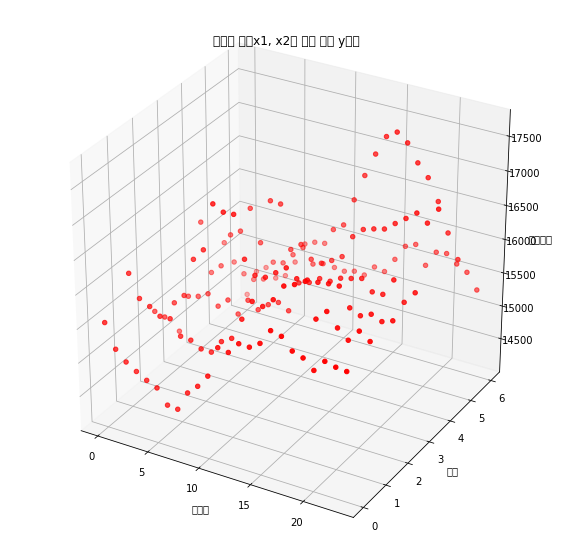

In [132]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_title('다변수 입력x1, x2에 대한 출력 y분포')
ax.set_xlabel('집계시')
ax.set_ylabel('요일')
ax.set_zlabel('통행시간')
plot = ax.scatter3D(x1, x2, y, c='r')
plt.show()

#2. 다변수 처리 using TensorFlow

In [135]:
# 늘 했듯이 우선 learning_rate(경사하강구간에서 한 번에 얼마나 점프할지), epoch (학습 횟수) 먼저 설정을 한다.
import tensorflow as tf
learning_rate = 1e-6
learning_epochs = 2000

In [136]:
# 우리가 사용할 옵티마이저가 경사하강이니 해당 옵티마이저 생성
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
# 그 후 손실함수 방식 선정
mse = tf.keras.losses.mean_squared_error
# 이제 모델 생성 후 설정해주자~!
model = tf.keras.models.Sequential() # 자세히 보면 케라스에서 지정 방식은 규칙이 있다. tf.keras.(models or losses or optimizers).(어떤 방식으로 할건지 방식이름)
model.add(tf.keras.layers.Dense(1, input_shape=(2,))) # 입력이 집계시, 요일로 2차원이 input_shape=(2,)
model.compile(loss=mse, optimizer=sgd)

In [137]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [138]:
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
6/6 [==============================] - 1s 4ms/step - loss: 248958848.0000
Epoch 2/2000
6/6 [==============================] - 0s 5ms/step - loss: 248096032.0000
Epoch 3/2000
6/6 [==============================] - 0s 6ms/step - loss: 247220816.0000
Epoch 4/2000
6/6 [==============================] - 0s 6ms/step - loss: 246321248.0000
Epoch 5/2000
6/6 [==============================] - 0s 5ms/step - loss: 245454240.0000
Epoch 6/2000
6/6 [==============================] - 0s 5ms/step - loss: 244609248.0000
Epoch 7/2000
6/6 [==============================] - 0s 6ms/step - loss: 243756064.0000
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 242903696.0000
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 242022992.0000
Epoch 10/2000
6/6 [==============================] - 0s 3ms/step - loss: 241171072.0000
Epoch 11/2000
6/6 [==============================] - 0s 3ms/step - loss: 240298544.0000
Epoch 12/2000
6/6 [======================

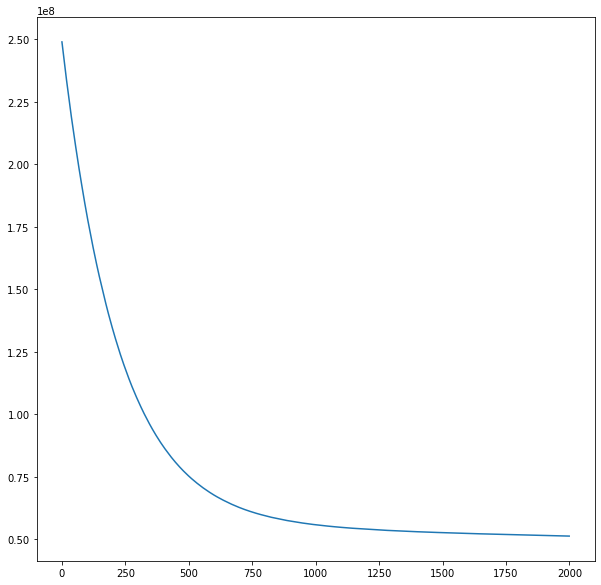

In [139]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])